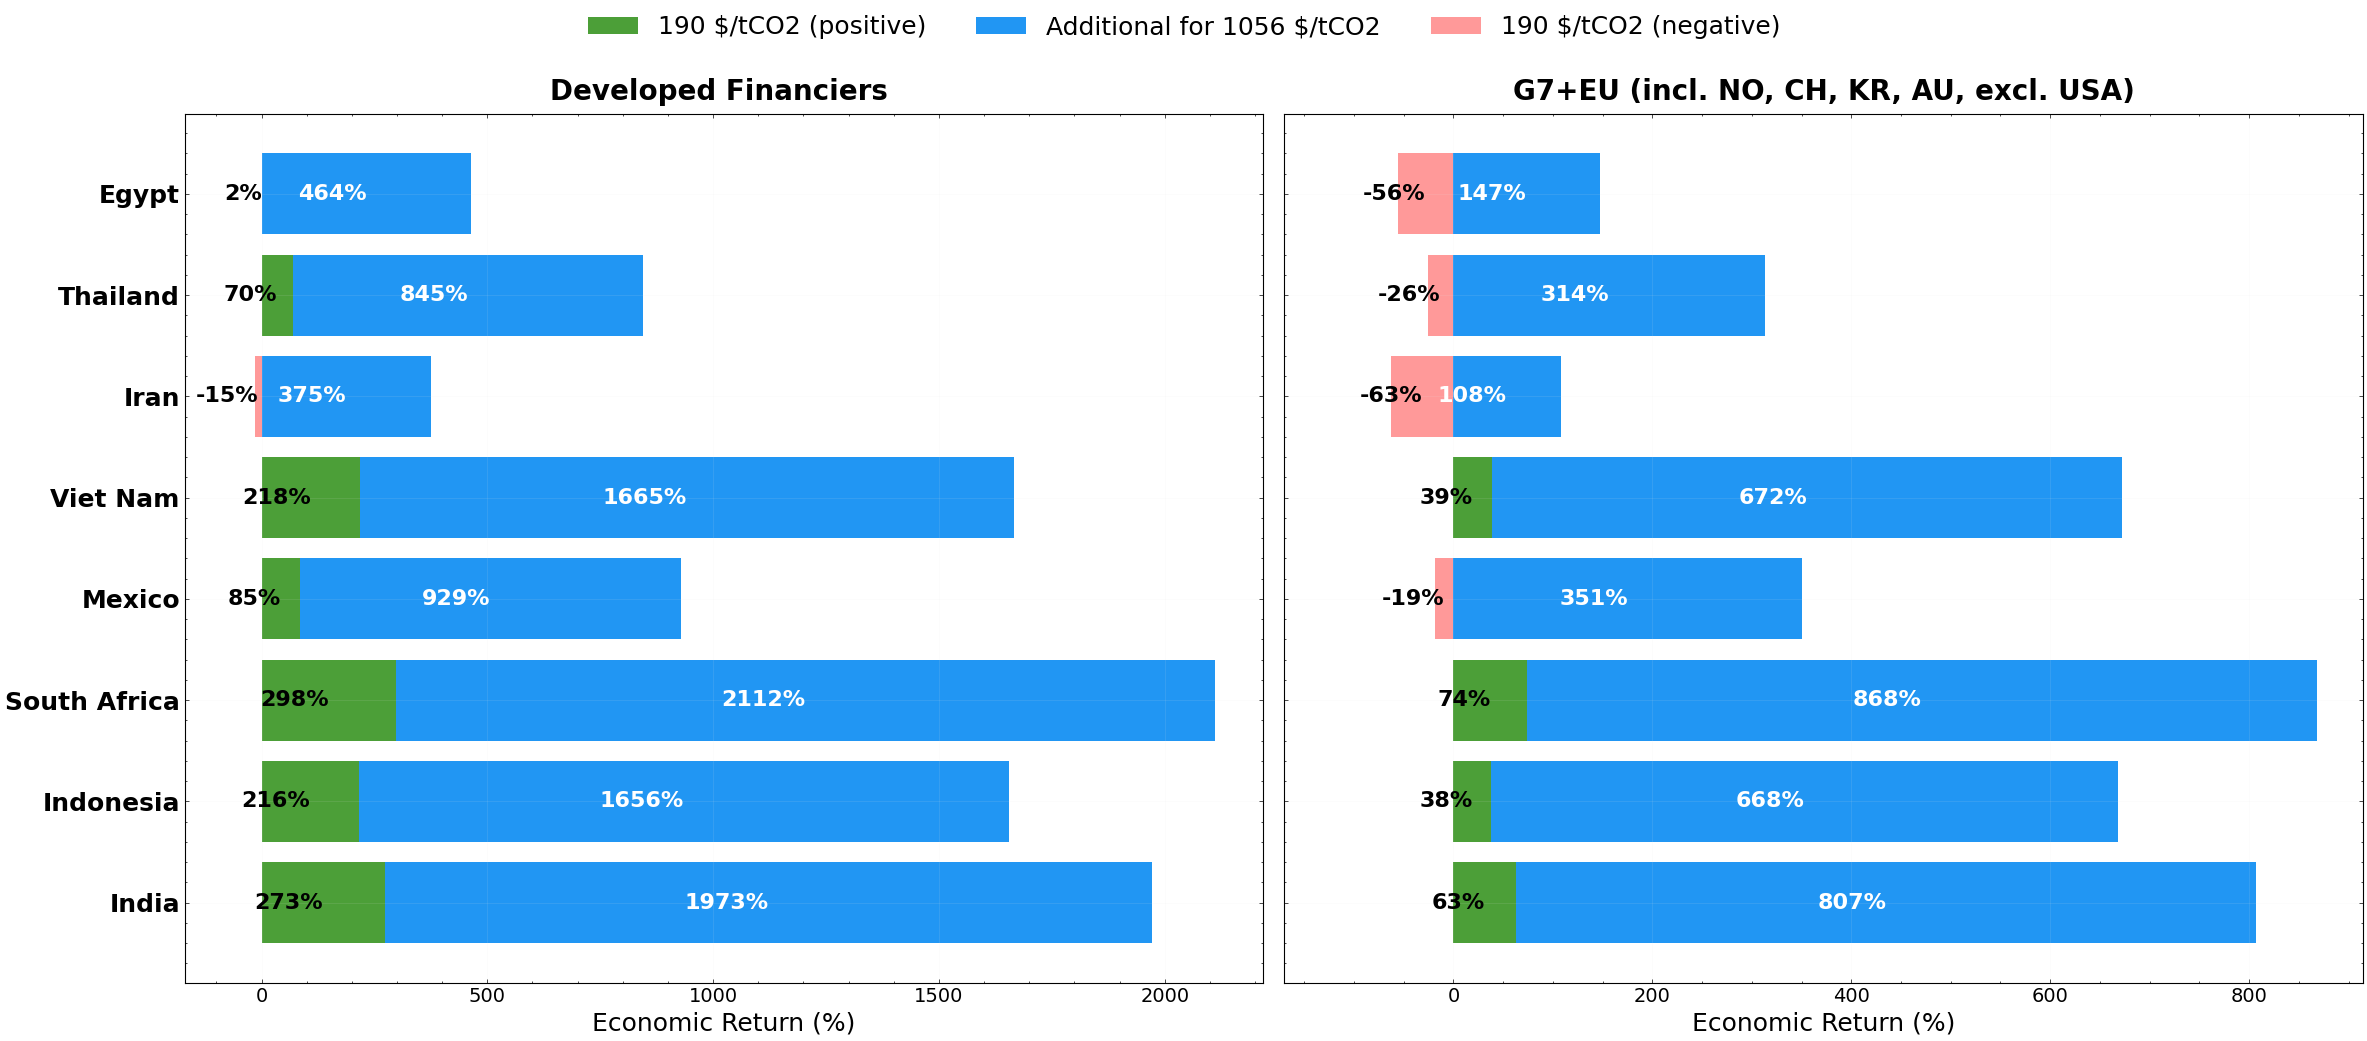

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Set the style
plt.style.use(['science', 'nature', 'light'])

# Update plot parameters with larger fonts and elements
plt.rcParams.update({
   'figure.facecolor': 'white',
   'axes.facecolor': 'white',
   'savefig.facecolor': 'white',
   'font.family': 'DejaVu Sans',
   'font.size': 14,
   'axes.labelsize': 14,
   'axes.titlesize': 16,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'axes.linewidth': 0.8,
   'grid.linewidth': 0.5,
   'lines.linewidth': 1.2,
   'lines.markersize': 5,
   'axes.spines.top': True,
   'axes.spines.right': True,
   'axes.grid': True,
   'grid.alpha': 0.15,
   'grid.color': '#E5E5E5',
   'text.usetex': False,
})

# Read the Excel file
df = pd.read_excel("/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx", 
                   sheet_name="8 C _ Dev Financier Model")

# Define country order
country_order = ['India', 'Indonesia', 'South Africa', 'Mexico', 'Viet Nam', 'Iran', 'Thailand', 'Egypt']

def create_side_by_side_plots(df, country_order):
   # Create figure with two subplots side by side with increased size
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
   
   # Colors
   color_190_pos = '#4C9F38'    # Green for positive 190 SCC returns
   color_190_neg = '#FF9999'    # Red for negative 190 SCC returns
   color_1056 = '#2196F3'       # Blue for additional 1056 returns
   
   # Store legend handles and labels
   legend_handles = []
   legend_labels = []
   
   # Process each financier group
   for idx, (ax, group) in enumerate(zip([ax1, ax2], df['Financier Group '].unique())):
       # Get data for this group and order it
       group_data = df[df['Financier Group '] == group]
       
       y_pos = np.arange(len(country_order))
       returns_190 = []
       returns_1056 = []
       
       # Collect data in order
       for country in country_order:
           country_data = group_data[group_data['Country '] == country].iloc[0]
           returns_190.append(country_data['Return % 190 SCC'])
           returns_1056.append(country_data['Return % 1056 SCC'])
       
       returns_190 = np.array(returns_190)
       returns_1056 = np.array(returns_1056)
       additional_returns = returns_1056 - returns_190
       
       # Handle positive and negative 190 returns separately
       mask_pos = returns_190 >= 0
       mask_neg = returns_190 < 0
       
       # Plot positive 190 returns
       if any(mask_pos):
           bar_190_pos = ax.barh(y_pos[mask_pos], returns_190[mask_pos], height=0.8, 
                                color=color_190_pos)
           if idx == 0:  # Only store legend handles from first plot
               legend_handles.append(bar_190_pos)
               legend_labels.append('190 $/tCO2 (positive)')
           
           # Plot additional returns for positive 190
           bar_1056_pos = ax.barh(y_pos[mask_pos], additional_returns[mask_pos], height=0.8,
                                 left=returns_190[mask_pos], color=color_1056)
           if idx == 0:
               legend_handles.append(bar_1056_pos)
               legend_labels.append('Additional for 1056 $/tCO2')
       
       # Plot negative 190 returns
       if any(mask_neg):
           bar_190_neg = ax.barh(y_pos[mask_neg], returns_190[mask_neg], height=0.8, 
                                color=color_190_neg)
           if idx == 0:
               legend_handles.append(bar_190_neg)
               legend_labels.append('190 $/tCO2 (negative)')
           
           # Plot full 1056 returns for negative 190
           bar_1056_neg = ax.barh(y_pos[mask_neg], returns_1056[mask_neg], height=0.8,
                                 color=color_1056)
       
       # Add value labels
       for i in range(len(country_order)):
           r190 = returns_190[i]
           r1056 = returns_1056[i]
           
           # Label for 190 return
           if r190 >= 0:
               ax.text(r190/2, y_pos[i], f'{r190:.0f}%', 
                      ha='right', va='center', color='black', fontsize=16, fontweight='bold')
           else:
               ax.text(r190/2, y_pos[i], f'{r190:.0f}%', 
                      ha='right', va='center', color='black', fontsize=16, fontweight='bold')
           
           # Label for 1056 return
           if r190 >= 0:
               ax.text(r190 + additional_returns[i]/2, y_pos[i], f'{r1056:.0f}%', 
                      ha='right', va='center', color='white', fontsize=16, fontweight='bold')
           else:
               ax.text(r1056/2, y_pos[i], f'{r1056:.0f}%', 
                      ha='right', va='center', color='white', fontsize=16, fontweight='bold')
       
       # Customize plot
       ax.set_yticks(y_pos)
       if idx == 0:  # Only show country labels on the left plot
           ax.set_yticklabels(country_order, fontsize=18, fontweight='bold')
       else:  # Remove country labels from the right plot
           ax.set_yticklabels([])
           
       ax.set_xlabel('Economic Return (%)', fontsize=18)
       ax.set_title(group, pad=10, fontsize=20, fontweight='bold')
       ax.grid(True, alpha=0.15)
       
       # Increase x-axis tick font size
       ax.tick_params(axis='x', labelsize=14)
       
       # Add padding between y-axis and bars
       ax.set_xlim(left=-170)
   
   # Add single legend to the figure
   fig.legend(legend_handles, legend_labels, 
             bbox_to_anchor=(0.5, 1.03), loc='center', 
             ncol=3, fontsize=18)
   
   plt.tight_layout()
   return fig

# Create and show the visualization
fig = create_side_by_side_plots(df, country_order)
plt.show()

# Uncomment to save
# plt.savefig('returns_visualization.png', bbox_inches='tight', dpi=300, facecolor='white')
# plt.close()

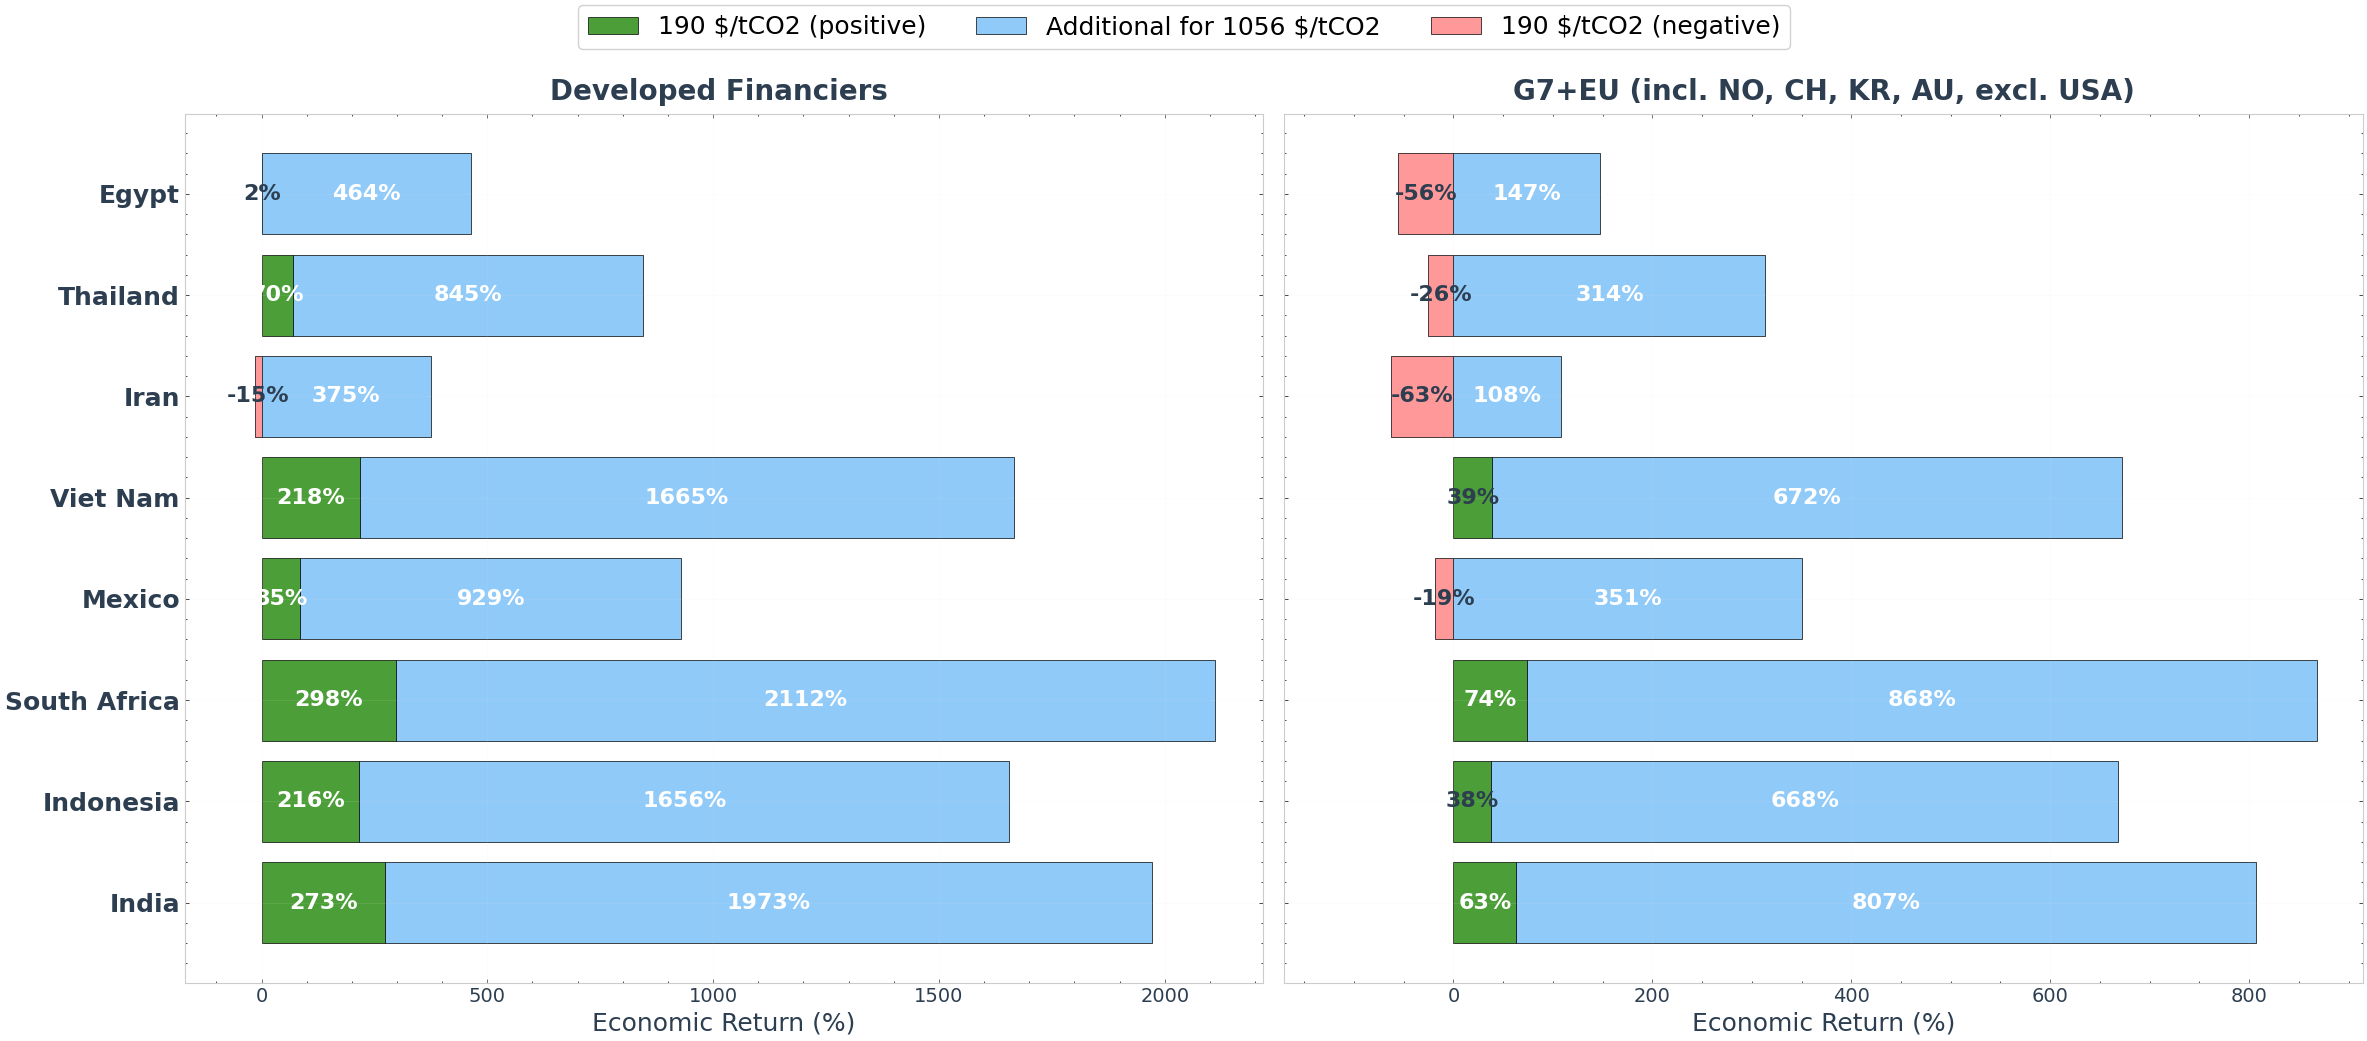

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Set the style
plt.style.use(['science', 'nature', 'light'])

# Update plot parameters with larger fonts and elements
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.2,
    'lines.markersize': 5,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

# Read the Excel file
df = pd.read_excel("/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx", 
                   sheet_name="8 C _ Dev Financier Model")

# Define country order
country_order = ['India', 'Indonesia', 'South Africa', 'Mexico', 'Viet Nam', 'Iran', 'Thailand', 'Egypt']

def create_side_by_side_plots(df, country_order):
    # Create figure with two subplots side by side with increased size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
    
    # Updated color scheme to match the reference plot
    colors = {
        'positive_190': '#4C9F38',     # Original green for positive returns
        'negative_190': '#FF9999',     # Soft red for negative returns
        'additional_1056': '#90CAF9',  # soft blue for 1056 returns
        'muted_green': '#B4D7A2',      # Muted green for secondary elements
        'muted_blue': '#A5C4D4',       # Muted blue for secondary elements
        'text_dark': '#2C3E50',        # Dark color for primary text
        'text_light': '#FFFFFF'        # White for text on dark backgrounds
    }
    
    # Store legend handles and labels
    legend_handles = []
    legend_labels = []
    
    # Process each financier group
    for idx, (ax, group) in enumerate(zip([ax1, ax2], df['Financier Group '].unique())):
        # Get data for this group and order it
        group_data = df[df['Financier Group '] == group]
        
        y_pos = np.arange(len(country_order))
        returns_190 = []
        returns_1056 = []
        
        # Collect data in order
        for country in country_order:
            country_data = group_data[group_data['Country '] == country].iloc[0]
            returns_190.append(country_data['Return % 190 SCC'])
            returns_1056.append(country_data['Return % 1056 SCC'])
        
        returns_190 = np.array(returns_190)
        returns_1056 = np.array(returns_1056)
        additional_returns = returns_1056 - returns_190
        
        # Handle positive and negative 190 returns separately
        mask_pos = returns_190 >= 0
        mask_neg = returns_190 < 0
        
        # Plot positive 190 returns with updated colors
        if any(mask_pos):
            bar_190_pos = ax.barh(y_pos[mask_pos], returns_190[mask_pos], 
                                 height=0.8, 
                                 color=colors['positive_190'],
                                 edgecolor='black',
                                 linewidth=0.5)
            if idx == 0:
                legend_handles.append(bar_190_pos)
                legend_labels.append('190 $/tCO2 (positive)')
            
            # Plot additional returns for positive 190
            bar_1056_pos = ax.barh(y_pos[mask_pos], additional_returns[mask_pos], 
                                  height=0.8,
                                  left=returns_190[mask_pos], 
                                  color=colors['additional_1056'],
                                  edgecolor='black',
                                  linewidth=0.5)
            if idx == 0:
                legend_handles.append(bar_1056_pos)
                legend_labels.append('Additional for 1056 $/tCO2')
        
        # Plot negative 190 returns
        if any(mask_neg):
            bar_190_neg = ax.barh(y_pos[mask_neg], returns_190[mask_neg], 
                                 height=0.8, 
                                 color=colors['negative_190'],
                                 edgecolor='black',
                                 linewidth=0.5)
            if idx == 0:
                legend_handles.append(bar_190_neg)
                legend_labels.append('190 $/tCO2 (negative)')
            
            # Plot full 1056 returns for negative 190
            bar_1056_neg = ax.barh(y_pos[mask_neg], returns_1056[mask_neg], 
                                  height=0.8,
                                  color=colors['additional_1056'],
                                  edgecolor='black',
                                  linewidth=0.5)
        
        # Add value labels with improved contrast
        for i in range(len(country_order)):
            r190 = returns_190[i]
            r1056 = returns_1056[i]
            
            # Label for 190 return
            if r190 >= 0:
                text_color = colors['text_dark'] if abs(r190) < 50 else colors['text_light']
                ax.text(r190/2, y_pos[i], f'{r190:.0f}%', 
                       ha='center', va='center', 
                       color=text_color, 
                       fontsize=16, 
                       fontweight='bold')
            else:
                ax.text(r190/2, y_pos[i], f'{r190:.0f}%', 
                       ha='center', va='center', 
                       color=colors['text_dark'], 
                       fontsize=16, 
                       fontweight='bold')
            
            # Label for 1056 return
            if r190 >= 0:
                ax.text(r190 + additional_returns[i]/2, y_pos[i], f'{r1056:.0f}%', 
                       ha='center', va='center', 
                       color=colors['text_light'], 
                       fontsize=16, 
                       fontweight='bold')
            else:
                ax.text(r1056/2, y_pos[i], f'{r1056:.0f}%', 
                       ha='center', va='center', 
                       color=colors['text_light'], 
                       fontsize=16, 
                       fontweight='bold')
        
        # Customize plot
        ax.set_yticks(y_pos)
        if idx == 0:  # Only show country labels on the left plot
            ax.set_yticklabels(country_order, fontsize=18, fontweight='bold', color=colors['text_dark'])
        else:  # Remove country labels from the right plot
            ax.set_yticklabels([])
        
        ax.set_xlabel('Economic Return (%)', fontsize=18, color=colors['text_dark'])
        ax.set_title(group, pad=10, fontsize=20, fontweight='bold', color=colors['text_dark'])
        ax.grid(True, alpha=0.15, color='#E5E5E5')
        
        # Style the axis lines and ticks
        ax.spines['top'].set_color('#CCCCCC')
        ax.spines['right'].set_color('#CCCCCC')
        ax.spines['bottom'].set_color('#CCCCCC')
        ax.spines['left'].set_color('#CCCCCC')
        
        # Increase x-axis tick font size and color
        ax.tick_params(axis='x', labelsize=14, colors=colors['text_dark'])
        
        # Add padding between y-axis and bars
        ax.set_xlim(left=-170)
    
    # Add single legend to the figure with updated style
    fig.legend(legend_handles, legend_labels, 
              bbox_to_anchor=(0.5, 1.03), 
              loc='center', 
              ncol=3, 
              fontsize=18,
              frameon=True,
              edgecolor='#CCCCCC',
              facecolor='white',
              framealpha=0.9)
    
    plt.tight_layout()
    return fig

# Create and show the visualization
fig = create_side_by_side_plots(df, country_order)
plt.show()

# Uncomment to save
# plt.savefig('returns_visualization.png', bbox_inches='tight', dpi=300, facecolor='white')
# plt.close()

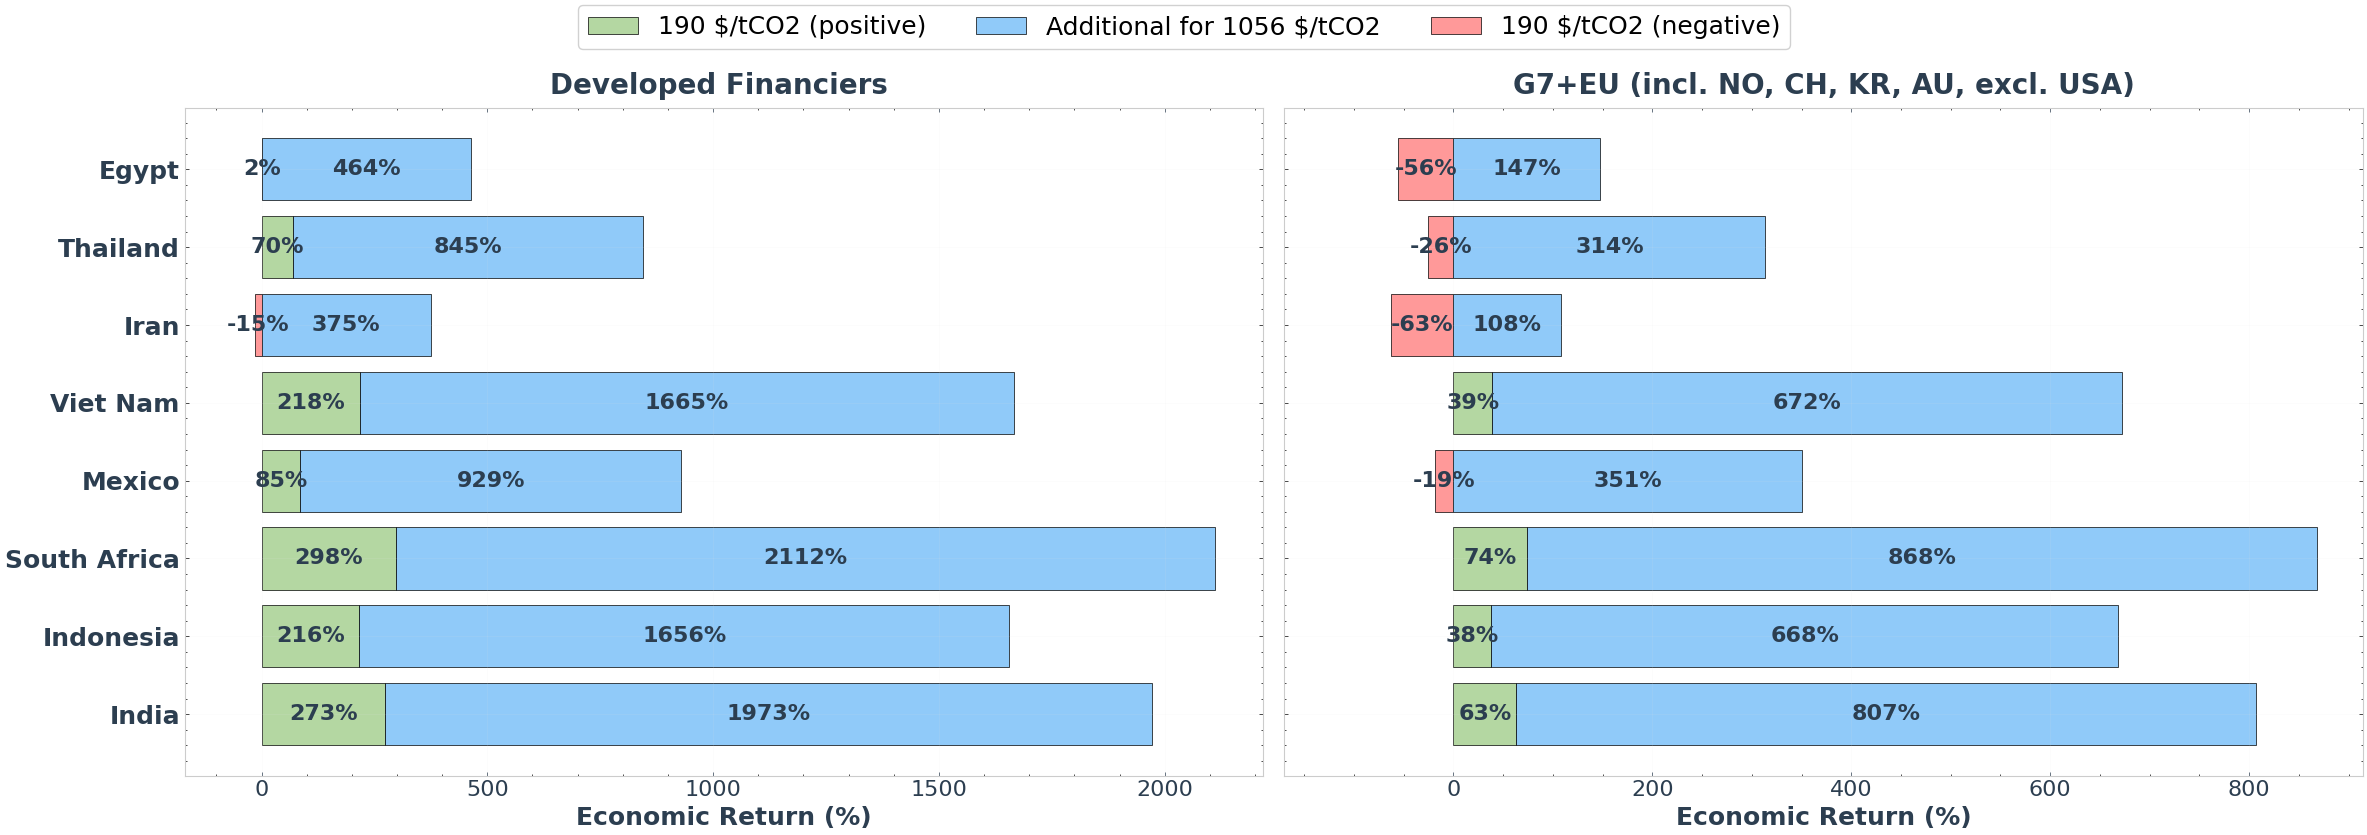

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Set the style
plt.style.use(['science', 'nature', 'light'])

# Update plot parameters with larger fonts and elements
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.2,
    'lines.markersize': 5,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

# Read the Excel file
df = pd.read_excel("/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx", 
                   sheet_name="8 C _ Dev Financier Model")

# Define country order
country_order = ['India', 'Indonesia', 'South Africa', 'Mexico', 'Viet Nam', 'Iran', 'Thailand', 'Egypt']

def create_side_by_side_plots(df, country_order):
    # Create figure with two subplots side by side with increased size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
    
    # Updated color scheme with muted, pastel colors
    colors = {
        'positive_190': '#B4D7A2',     # Muted sage green (from reference)
        'negative_190': '#FF9999',     # soft red for negative returns
        'additional_1056': '#90CAF9',  # Muted blue (from reference)
        'muted_green': '#95B1A8',      # Additional muted green
        'text_dark': '#2C3E50',        # Dark color for primary text
        'text_light': '#FFFFFF'        # White for text on dark backgrounds
    }
    
    # Store legend handles and labels
    legend_handles = []
    legend_labels = []
    
    # Process each financier group
    for idx, (ax, group) in enumerate(zip([ax1, ax2], df['Financier Group '].unique())):
        # Get data for this group and order it
        group_data = df[df['Financier Group '] == group]
        
        y_pos = np.arange(len(country_order))
        returns_190 = []
        returns_1056 = []
        
        # Collect data in order
        for country in country_order:
            country_data = group_data[group_data['Country '] == country].iloc[0]
            returns_190.append(country_data['Return % 190 SCC'])
            returns_1056.append(country_data['Return % 1056 SCC'])
        
        returns_190 = np.array(returns_190)
        returns_1056 = np.array(returns_1056)
        additional_returns = returns_1056 - returns_190
        
        # Handle positive and negative 190 returns separately
        mask_pos = returns_190 >= 0
        mask_neg = returns_190 < 0
        
        # Plot positive 190 returns with muted colors
        if any(mask_pos):
            bar_190_pos = ax.barh(y_pos[mask_pos], returns_190[mask_pos], 
                                 height=0.8, 
                                 color=colors['positive_190'],
                                 edgecolor='black',
                                 linewidth=0.5)
            if idx == 0:
                legend_handles.append(bar_190_pos)
                legend_labels.append('190 $/tCO2 (positive)')
            
            # Plot additional returns for positive 190
            bar_1056_pos = ax.barh(y_pos[mask_pos], additional_returns[mask_pos], 
                                  height=0.8,
                                  left=returns_190[mask_pos], 
                                  color=colors['additional_1056'],
                                  edgecolor='black',
                                  linewidth=0.5)
            if idx == 0:
                legend_handles.append(bar_1056_pos)
                legend_labels.append('Additional for 1056 $/tCO2')
        
        # Plot negative 190 returns
        if any(mask_neg):
            bar_190_neg = ax.barh(y_pos[mask_neg], returns_190[mask_neg], 
                                 height=0.8, 
                                 color=colors['negative_190'],
                                 edgecolor='black',
                                 linewidth=0.5)
            if idx == 0:
                legend_handles.append(bar_190_neg)
                legend_labels.append('190 $/tCO2 (negative)')
            
            # Plot full 1056 returns for negative 190
            bar_1056_neg = ax.barh(y_pos[mask_neg], returns_1056[mask_neg], 
                                  height=0.8,
                                  color=colors['additional_1056'],
                                  edgecolor='black',
                                  linewidth=0.5)
        
        # Add value labels with improved contrast
        for i in range(len(country_order)):
            r190 = returns_190[i]
            r1056 = returns_1056[i]
            
            # Label for 190 return - always use dark text for better visibility on pastel
            ax.text(r190/2, y_pos[i], f'{r190:.0f}%', 
                   ha='center', va='center', 
                   color=colors['text_dark'], 
                   fontsize=16, 
                   fontweight='bold')
            
            # Label for 1056 return
            if r190 >= 0:
                ax.text(r190 + additional_returns[i]/2, y_pos[i], f'{r1056:.0f}%', 
                       ha='center', va='center', 
                       color=colors['text_dark'], 
                       fontsize=16, 
                       fontweight='bold')
            else:
                ax.text(r1056/2, y_pos[i], f'{r1056:.0f}%', 
                       ha='center', va='center', 
                       color=colors['text_dark'], 
                       fontsize=16, 
                       fontweight='bold')
        
        # Customize plot
        ax.set_yticks(y_pos)
        if idx == 0:  # Only show country labels on the left plot
            ax.set_yticklabels(country_order, fontsize=18, fontweight='bold', color=colors['text_dark'])
        else:  # Remove country labels from the right plot
            ax.set_yticklabels([])
        
        ax.set_xlabel('Economic Return (%)', fontsize=18,fontweight='bold', color=colors['text_dark'])
        ax.set_title(group, pad=10, fontsize=20, fontweight='bold', color=colors['text_dark'])
        ax.grid(True, alpha=0.15, color='#E5E5E5')
        
        # Style the axis lines and ticks
        ax.spines['top'].set_color('#CCCCCC')
        ax.spines['right'].set_color('#CCCCCC')
        ax.spines['bottom'].set_color('#CCCCCC')
        ax.spines['left'].set_color('#CCCCCC')
        
        # Increase x-axis tick font size and color
        ax.tick_params(axis='x', labelsize=16, colors=colors['text_dark'])
        
        # Add padding between y-axis and bars
        ax.set_xlim(left=-170)
    
    # Add single legend to the figure with updated style
    fig.legend(legend_handles, legend_labels, 
              bbox_to_anchor=(0.5, 1.03), 
              loc='center', 
              ncol=3, 
              fontsize=18,
              frameon=True,
              edgecolor='#CCCCCC',
              facecolor='white',
              framealpha=0.9)
    
    plt.tight_layout()
    return fig

# Create and show the visualization
fig = create_side_by_side_plots(df, country_order)
plt.show()

# Uncomment to save
# plt.savefig('returns_visualization.png', bbox_inches='tight', dpi=300, facecolor='white')